In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [34]:
df = pd.read_csv('car_data.csv')

In [33]:
df.head()
# df[df['selling_price'] > 8000000].head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.shape

(4340, 8)

In [6]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [7]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


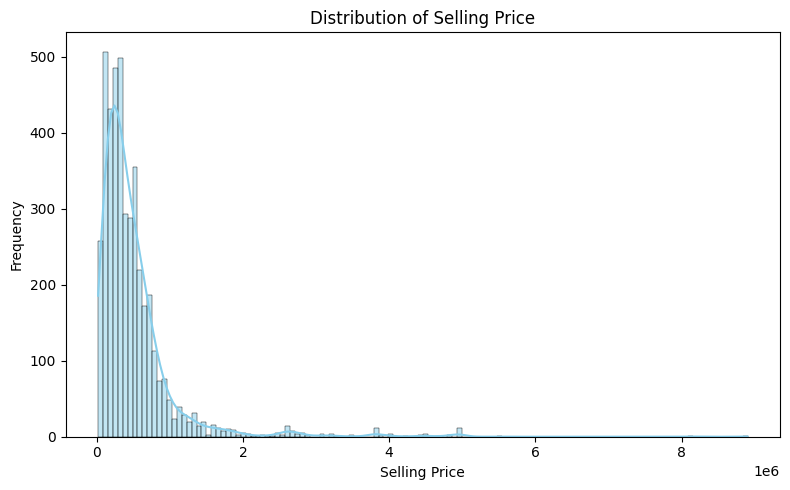

In [8]:
# Selling Price Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['selling_price'], kde=True, color='skyblue')
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

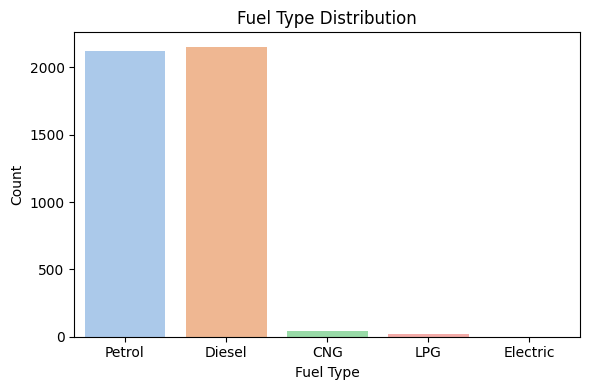

In [14]:
# Fuel Type Count
plt.figure(figsize=(6, 4))
sns.countplot(x='fuel', data=df, hue='fuel', palette='pastel', legend=False)
plt.title("Fuel Type Distribution")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

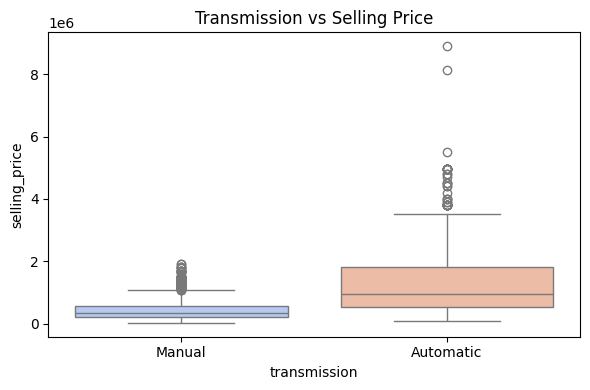

In [16]:
# Transmission vs Selling Price
plt.figure(figsize=(6, 4))
sns.boxplot(x='transmission', y='selling_price', data=df, hue='transmission', palette='coolwarm', legend=False )
plt.title("Transmission vs Selling Price")
plt.tight_layout()
plt.show()


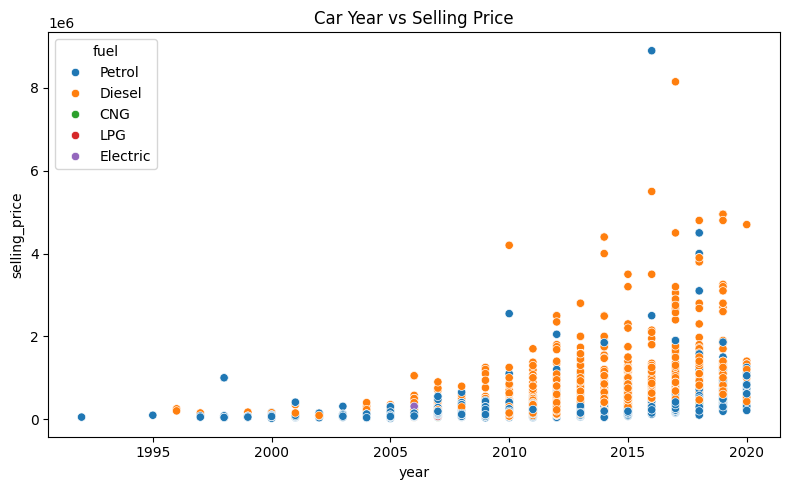

In [17]:
# Year vs Selling Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x='year', y='selling_price', hue='fuel', data=df)
plt.title("Car Year vs Selling Price")
plt.tight_layout()
plt.show()

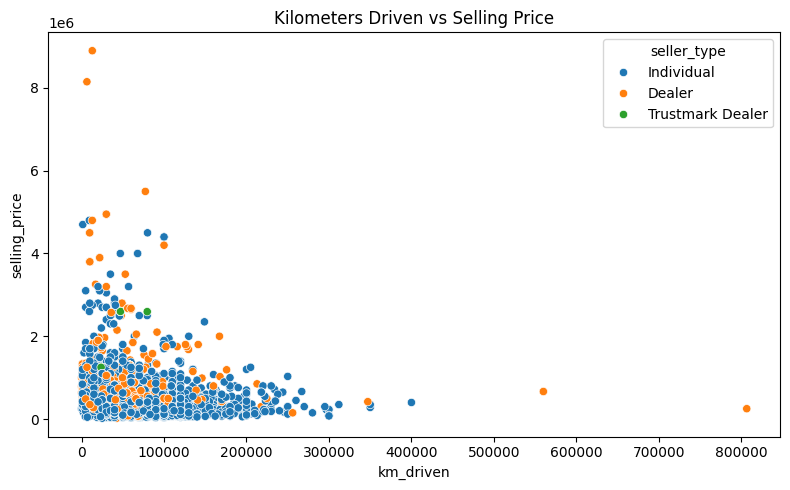

In [23]:
# KM Driven vs Selling Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x='km_driven', y='selling_price', hue='seller_type', data=df)
plt.title("Kilometers Driven vs Selling Price")
plt.tight_layout()
plt.show()

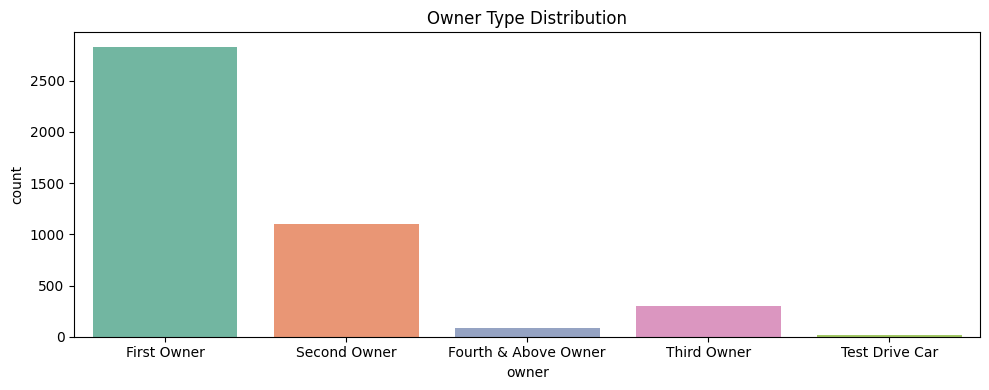

In [27]:
# Owner Distribution
plt.figure(figsize=(10, 4))
sns.countplot(x='owner', data=df, hue='owner', palette='Set2', legend=False)
plt.title("Owner Type Distribution")
plt.tight_layout()
plt.show()


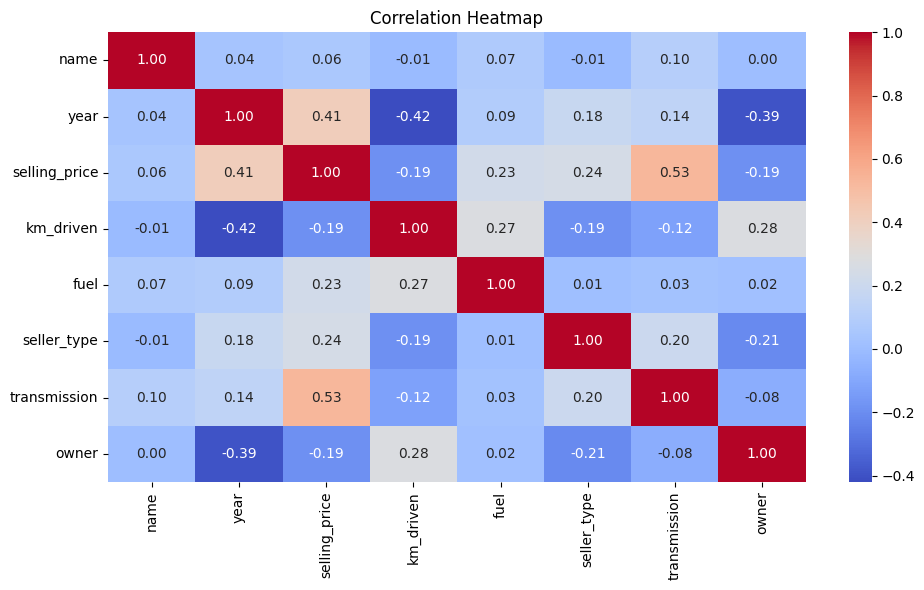

In [32]:
# Correlation Heatmap
df_encoded = df.copy()
# converts column str data to int...like yes,no to 1,0 
for col in df_encoded.select_dtypes(include='object'):
    df_encoded[col] = pd.factorize(df_encoded[col])[0]

plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()